Performing ADF Test on Original Series:
ADF Test Results
ADF Statistic: 0.22452522855736312
p-value: 0.9736040757269593
Critical Values: {'1%': -3.4329736635735393, '5%': -2.8626991196096556, '10%': -2.5673870444295406}
The series is non-stationary (fail to reject the null hypothesis).

Performing ADF Test on Differenced Series:
ADF Test Results
ADF Statistic: -9.412904488599562
p-value: 5.771043606228767e-16
Critical Values: {'1%': -3.4329747166494915, '5%': -2.862699584647827, '10%': -2.567387292022104}
The series is stationary (reject the null hypothesis).

Plotting ACF for Differenced Series:


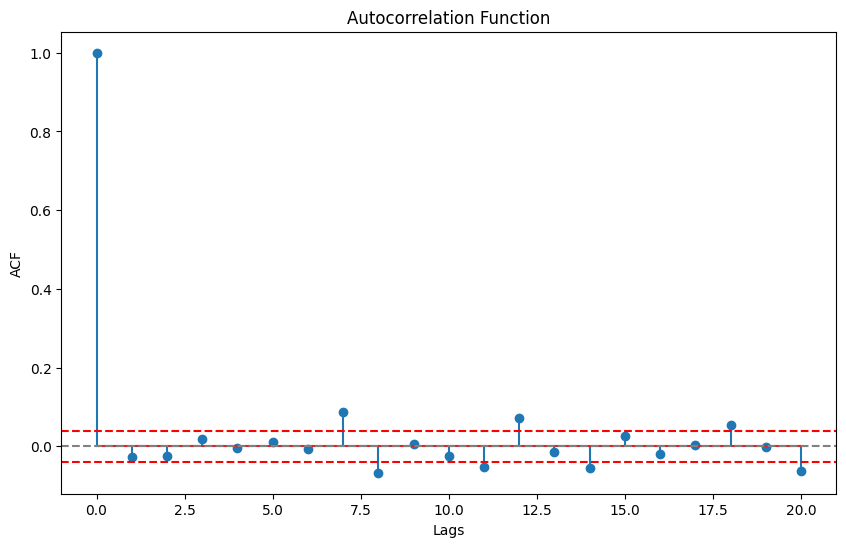

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf

# Load data
path = "TSLA.csv"  # Path to the CSV file
headers = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
df = pd.read_csv(path, names=headers, skiprows=1)
df.replace("null", np.nan, inplace=True)
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]] = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].astype(float)
df.set_index("Date", inplace=True)
data = df['Close']

# Step 1: ADF Test
def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("The series is stationary (reject the null hypothesis).")
    else:
        print("The series is non-stationary (fail to reject the null hypothesis).")

# Step 2: Plot ACF
def plot_acf(series, lags=20):
    lag_acf = acf(series, nlags=lags)
    plt.figure(figsize=(10, 6))
    plt.stem(range(len(lag_acf)), lag_acf)  # Removed use_line_collection
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(series)), linestyle='--', color='red')  # Positive confidence bound
    plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle='--', color='red')  # Negative confidence bound
    plt.title('Autocorrelation Function')
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.show()

# Perform ADF Test
print("Performing ADF Test on Original Series:")
perform_adf_test(data)

# Perform ADF Test on Differenced Series
data_diff = data.diff().dropna()  # First differencing
print("\nPerforming ADF Test on Differenced Series:")
perform_adf_test(data_diff)

# Plot ACF for Differenced Series
print("\nPlotting ACF for Differenced Series:")
plot_acf(data_diff)
